In [6]:
import tifffile
import os
import numpy as np
import matplotlib.pyplot as plt

dapi = '/home/steve/Projects/WeaverLab/STIFMaps/IPMN_images/27620_C0_full.tif'
collagen = '/home/steve/Projects/WeaverLab/STIFMaps/IPMN_images/27620_C1_full.tif'
output_dir = "/home/steve/Projects/WeaverLab/STIFMaps/IPMN_images/normalized_tiled"

In [8]:
# Function to plot histogram of pixel values
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=(image.min(), image.max()))
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

def check_image_dimensions(image_path):
    try:
        # Open the image using tifffile
        with tifffile.TiffFile(image_path) as tif:
            width, height = tif.pages[0].shape[:2]
            print(f"File: {os.path.basename(image_path)}, Dimensions: {width}x{height}")
    except Exception as e:
        print(f"Error opening {image_path}: {e}")

# Check dimensions of the original images
check_image_dimensions(dapi)
check_image_dimensions(collagen)

File: 27620_C0_full.tif, Dimensions: 25922x31398
File: 27620_C1_full.tif, Dimensions: 25922x31398


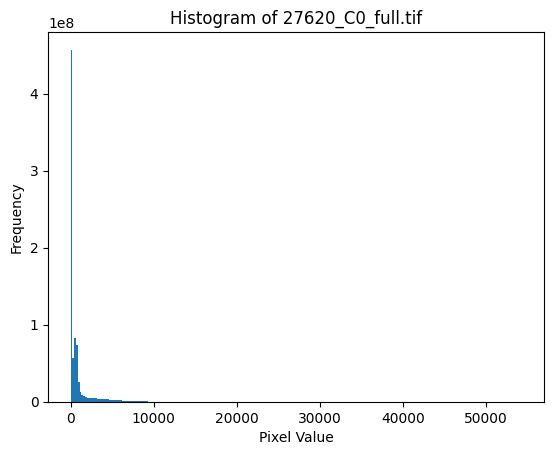

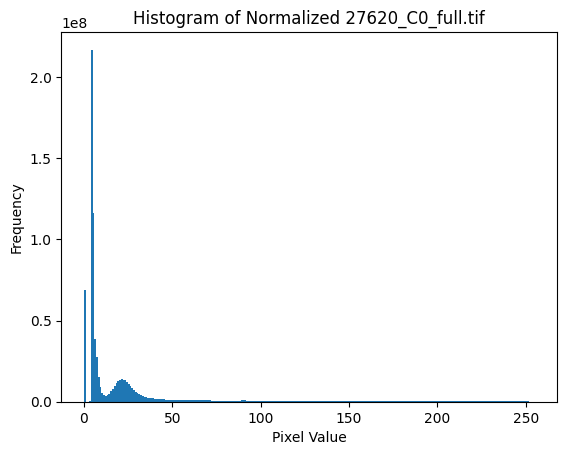

Normalized image saved as /home/steve/Projects/WeaverLab/STIFMaps/IPMN_images/normalized_tiled/27620_C0_full_normalized.tif


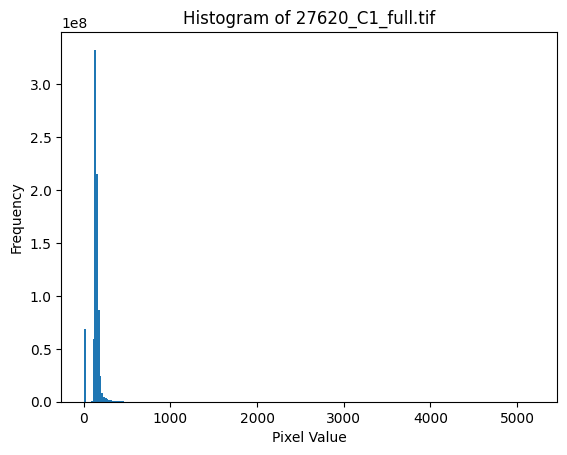

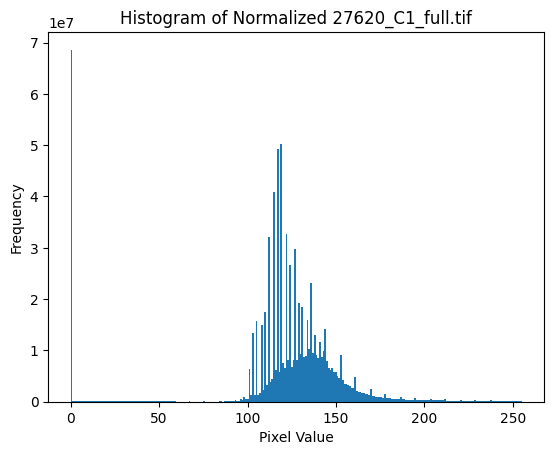

Normalized image saved as /home/steve/Projects/WeaverLab/STIFMaps/IPMN_images/normalized_tiled/27620_C1_full_normalized.tif


In [10]:
# Function to normalize an image using percentiles
def normalize_image(image, lower_percentile=1, upper_percentile=99):
    """Normalize the image to the range [0, 255] using percentile-based min and max values."""
    min_val = np.percentile(image, lower_percentile)
    max_val = np.percentile(image, upper_percentile)
    normalized_image = ((image - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    return normalized_image

# Generate tiled images
def gen_tile_images(input_path, output_dir, tile_size=5003):
    # Open the large image using tifffile
    tif = tifffile.TiffFile(input_path)
    image = tif.asarray()

    # Plot histogram of the original image
    plot_histogram(image, f"Histogram of {os.path.basename(input_path)}")

    # Normalize the image using percentile-based min and max
    normalized_image = normalize_image(image)

    # Plot histogram of the normalized image
    plot_histogram(normalized_image, f"Histogram of Normalized {os.path.basename(input_path)}")
    
    # Save a copy of the normalized image
    base_name = os.path.splitext(os.path.basename(input_path))[0]
    normalized_image_path = os.path.join(output_dir, f"{base_name}_normalized.tif")
    tifffile.imwrite(normalized_image_path, normalized_image)
    print(f"Normalized image saved as {normalized_image_path}")

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Get the dimensions of the image
    height, width = normalized_image.shape[:2]

    # Calculate the number of tiles
    num_tiles_x = (width + tile_size - 1) // tile_size
    num_tiles_y = (height + tile_size - 1) // tile_size

    # Iterate over the image and crop tiles
    for i in range(num_tiles_y):
        for j in range(num_tiles_x):
            # Calculate the coordinates for the current tile
            left = j * tile_size
            upper = i * tile_size
            right = min(left + tile_size, width)
            lower = min(upper + tile_size, height)

            # Crop the tile
            tile = normalized_image[upper:lower, left:right]

            # Create a new image with the desired size
            new_tile = np.zeros((tile_size, tile_size), dtype=np.uint8)
            new_tile[:tile.shape[0], :tile.shape[1]] = tile

            # Save the tile using tifffile
            tile_filename = os.path.join(output_dir, f"{base_name}_tile_{i}_{j}.tif")
            tifffile.imwrite(tile_filename, new_tile)

gen_tile_images(dapi, output_dir)
gen_tile_images(collagen, output_dir)

In [4]:
# check_image_dimensions("/home/steve/Projects/WeaverLab/STIFMaps/IPMN_images/tiled/27620_C0_full_tile_0_0.tif")
check_image_dimensions("/home/steve/Projects/WeaverLab/STIFMaps/IPMN_images/normalized_tiled/27620_C0_full_tile_0_0.tif")

Error opening /home/steve/Projects/WeaverLab/STIFMaps/IPMN_images/tiled_new/27620_C0_full_tile_0_0.tif: [Errno 2] No such file or directory: '/home/steve/Projects/WeaverLab/STIFMaps/IPMN_images/tiled_new/27620_C0_full_tile_0_0.tif'
